### objective :
salary that should be offered to new employee of the company on the basis of their desgination that is level of the employee. Here we will use the concept of SVR and try to predict the salary . 

In [1]:
# upload the dataset 
import pandas as pd
dataset= pd.read_csv("position_salary.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
# here salary is ouput say "y" and level is independent variable "X"
X=dataset.iloc[:,1:2].values
y=dataset.iloc[:,2:].values

In [4]:
# Feature scaling 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [7]:
# using SVR algorithm from sklearn 
from sklearn.svm import SVR
regressor=SVR(kernel="rbf")
regressor.fit(X,y)

C:\Users\Vidya sagar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

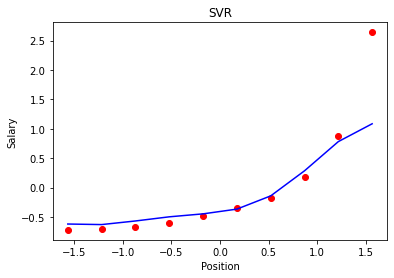

In [10]:
#visulation 
import matplotlib.pyplot as plt
plt.scatter(X, y , color="red")
plt.plot(X, regressor.predict(X), color="blue")
plt.title("SVR")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

## make predication 
Since we want to predict the salary for an employee at level 6.5 - first we will have to do feature scaling to transform value 6.5
Then we have to do the prediction
Finally since the predicted value is already scaled, we have to do inverse transformation to get the actual value
These steps are outlined below. 



In [11]:
import numpy as np
# First transform 6.5 to feature scaling
sc_X_val = sc_X.transform(np.array([[6.5]]))
# Second predict the value
scaled_y_pred = regressor.predict(sc_X_val)
# Third - since this is scaled - we have to inverse transform
y_pred = sc_y.inverse_transform(scaled_y_pred) 



In [13]:
print(y_pred)

[170370.0204065]
